# Day 5 (0801)

### GCE + sqlite3 資料庫
- 延續上星期的練習，練習操作累計一個星期的資料
- 設計Web-API，讓你的網頁可以讓提供資料服務

### GCE更穩定的網頁服務
- gunicorn
- 開機執行服務

### Heroku
- 一鍵架設你的網頁服務
- 使用指令建立你的網頁
- 具有SSL的網頁服務

### 快速提供資料庫服務 @Heroku
- MySQL
- MariaDB
- PostgreSQL
- 其它

### 前端網頁程式
- 活的網頁: Javascript
- 如何和Web-API合作

----

# Day5-1 : 操作sqlite3中一星期的資料

In [1]:
import sqlite3
import time
import json

aqi_db = 'aqi_db.db'

- 先回憶我們怎麼寫進去的

In [ ]:
import requests
import sqlite3
import time
import json

url = 'http://opendata.epa.gov.tw/ws/Data/AQI/?$format=json'
r = requests.get(url)
data = r.json()

# initial local DB
aqi_db = 'aqi_db.db'
conn = sqlite3.connect(aqi_db)
cursor = conn.cursor()
cursor.execute('create table IF NOT EXISTS aqi (PublishTime text NOT NULL, County text, SiteName text, AQI int, PM10 int)')
cursor.close()
conn.commit()
conn.close()

for item in data:
    if item['County'] == '高雄市':
        print('[%s %s][%s] %s, %s' %(item['County'], item['SiteName'], item['PublishTime'], item['AQI'], item['PM10']) )
        
        #- insert into local DB
        conn = sqlite3.connect(aqi_db)
        cursor = conn.cursor()
        cursor.execute("insert into aqi (PublishTime, County, SiteName, AQI, PM10) values('%s', '%s', '%s', '%s', '%s')" 
                       %(item['PublishTime'], item['County'], item['SiteName'], item['AQI'], item['PM10']))
        cursor.close()
        conn.commit()
        conn.close()

In [3]:
# 取出最近的資料

conn = sqlite3.connect(aqi_db)
cursor = conn.cursor()
# select last 5 rows
res = cursor.execute("SELECT * FROM aqi ORDER BY PublishTime DESC limit 20")
rows = res.fetchall()

data_list = list(rows)
data_list

[('2020-07-30 22:00', '高雄市', '復興', 55, 27),
 ('2020-07-30 22:00', '高雄市', '小港', 59, 27),
 ('2020-07-30 22:00', '高雄市', '前鎮', 52, 30),
 ('2020-07-30 22:00', '高雄市', '前金', 55, 44),
 ('2020-07-30 22:00', '高雄市', '左營', 41, 32),
 ('2020-07-30 22:00', '高雄市', '楠梓', 46, 42),
 ('2020-07-30 22:00', '高雄市', '林園', 71, 23),
 ('2020-07-30 22:00', '高雄市', '大寮', 69, 35),
 ('2020-07-30 22:00', '高雄市', '鳳山', 49, 30),
 ('2020-07-30 22:00', '高雄市', '仁武', 51, 49),
 ('2020-07-30 22:00', '高雄市', '橋頭', 48, 33),
 ('2020-07-30 22:00', '高雄市', '美濃', 18, 22),
 ('2020-07-30 21:00', '高雄市', '復興', 53, 25),
 ('2020-07-30 21:00', '高雄市', '小港', 58, 30),
 ('2020-07-30 21:00', '高雄市', '前鎮', 48, 34),
 ('2020-07-30 21:00', '高雄市', '前金', 46, 35),
 ('2020-07-30 21:00', '高雄市', '左營', 38, 34),
 ('2020-07-30 21:00', '高雄市', '楠梓', 41, 30),
 ('2020-07-30 21:00', '高雄市', '林園', 74, 26),
 ('2020-07-30 21:00', '高雄市', '大寮', 64, 45)]

In [7]:
# 取出最舊的資料

conn = sqlite3.connect(aqi_db)
cursor = conn.cursor()
# select last 5 rows
res = cursor.execute("SELECT * FROM aqi ORDER BY PublishTime ASC limit 1")
rows = res.fetchall()

data_list = list(rows)
data_list

[('2020-07-24 21:00', '高雄市', '林園', 24, 7)]

In [9]:
# 取出某段時間的資料

conn = sqlite3.connect(aqi_db)
cursor = conn.cursor()
# select last 5 rows
res = cursor.execute("SELECT * FROM aqi WHERE PublishTime >= '2020-07-30 20:00' ORDER BY PublishTime ASC")
rows = res.fetchall()

data_list = list(rows)
data_list

[('2020-07-30 20:00', '高雄市', '復興', 47, 21),
 ('2020-07-30 20:00', '高雄市', '小港', 53, 28),
 ('2020-07-30 20:00', '高雄市', '前鎮', 46, 28),
 ('2020-07-30 20:00', '高雄市', '前金', 44, 31),
 ('2020-07-30 20:00', '高雄市', '左營', 44, 22),
 ('2020-07-30 20:00', '高雄市', '楠梓', 39, 37),
 ('2020-07-30 20:00', '高雄市', '林園', 77, 29),
 ('2020-07-30 20:00', '高雄市', '大寮', 61, 31),
 ('2020-07-30 20:00', '高雄市', '鳳山', 41, 28),
 ('2020-07-30 20:00', '高雄市', '仁武', 41, 27),
 ('2020-07-30 20:00', '高雄市', '橋頭', 44, 22),
 ('2020-07-30 20:00', '高雄市', '美濃', 19, 20),
 ('2020-07-30 21:00', '高雄市', '復興', 53, 25),
 ('2020-07-30 21:00', '高雄市', '小港', 58, 30),
 ('2020-07-30 21:00', '高雄市', '前鎮', 48, 34),
 ('2020-07-30 21:00', '高雄市', '前金', 46, 35),
 ('2020-07-30 21:00', '高雄市', '左營', 38, 34),
 ('2020-07-30 21:00', '高雄市', '楠梓', 41, 30),
 ('2020-07-30 21:00', '高雄市', '林園', 74, 26),
 ('2020-07-30 21:00', '高雄市', '大寮', 64, 45),
 ('2020-07-30 21:00', '高雄市', '鳳山', 42, 39),
 ('2020-07-30 21:00', '高雄市', '仁武', 44, 29),
 ('2020-07-30 21:00', '高雄市', '橋頭

In [10]:
# 取出最近的資料
SiteName = '左營'
conn = sqlite3.connect(aqi_db)
cursor = conn.cursor()
# select last 5 rows
res = cursor.execute("SELECT * FROM aqi WHERE SiteName = '%s' ORDER BY PublishTime DESC limit 10" %(SiteName) )
rows = res.fetchall()

data_list = list(rows)
cursor.close()
conn.commit()
conn.close()

data_list

[('2020-07-30 22:00', '高雄市', '左營', 41, 32),
 ('2020-07-30 21:00', '高雄市', '左營', 38, 34),
 ('2020-07-30 20:00', '高雄市', '左營', 44, 22),
 ('2020-07-30 19:00', '高雄市', '左營', 47, 28),
 ('2020-07-30 18:00', '高雄市', '左營', 50, 24),
 ('2020-07-30 17:00', '高雄市', '左營', 51, 18),
 ('2020-07-30 16:00', '高雄市', '左營', 50, 25),
 ('2020-07-30 15:00', '高雄市', '左營', 51, 31),
 ('2020-07-30 14:00', '高雄市', '左營', 47, 29),
 ('2020-07-30 13:00', '高雄市', '左營', 45, 26)]

In [13]:
# 取出最近的資料，並指定站號，時間由舊到新排序

SiteName = '左營'
conn = sqlite3.connect(aqi_db)
cursor = conn.cursor()
# select last 5 rows
res = cursor.execute("SELECT * FROM aqi WHERE SiteName = '%s' ORDER BY PublishTime DESC limit 10" %(SiteName) )
rows = res.fetchall()

data_list = list(rows)
cursor.close()
conn.commit()
conn.close()

def take_time(elem):
    return elem[0]
data_list.sort(key=take_time)

data_list



[('2020-08-01 00:00', '高雄市', '左營', 75, 35),
 ('2020-08-01 01:00', '高雄市', '左營', 72, 33),
 ('2020-08-01 02:00', '高雄市', '左營', 70, 34),
 ('2020-08-01 03:00', '高雄市', '左營', 70, 34),
 ('2020-08-01 04:00', '高雄市', '左營', 68, 40),
 ('2020-08-01 05:00', '高雄市', '左營', 66, 35),
 ('2020-08-01 06:00', '高雄市', '左營', 64, 35),
 ('2020-08-01 07:00', '高雄市', '左營', 66, 49),
 ('2020-08-01 08:00', '高雄市', '左營', 68, 51),
 ('2020-08-01 09:00', '高雄市', '左營', 65, 22)]

## 練習題：利用matplotlib繪製趨勢圖

In [16]:
aqi_list = []
time_list = []
pm10_list = []
for item in data_list:
    aqi_list.append(item[3])
    pm10_list.append(item[4])
    time_list.append(item[0])

In [17]:
time_list

['2020-08-01 00:00',
 '2020-08-01 01:00',
 '2020-08-01 02:00',
 '2020-08-01 03:00',
 '2020-08-01 04:00',
 '2020-08-01 05:00',
 '2020-08-01 06:00',
 '2020-08-01 07:00',
 '2020-08-01 08:00',
 '2020-08-01 09:00']

In [18]:
aqi_list

[75, 72, 70, 70, 68, 66, 64, 66, 68, 65]

In [19]:
%matplotlib inline

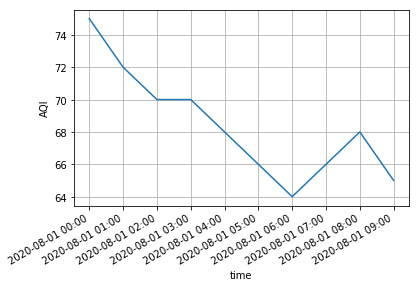

In [20]:
import matplotlib.pyplot as plt

# 整理資料
aqi_list = []
time_list = []
pm10_list = []
for item in data_list:
    aqi_list.append(item[3])
    pm10_list.append(item[4])
    time_list.append(item[0])
    
# 畫圖
fig,ax = plt.subplots()

plt.plot(time_list, aqi_list)
plt.xlabel('time')
plt.ylabel('AQI')
ax.set_xticklabels(time_list)
fig.autofmt_xdate(rotation=30)
plt.grid()


## 練習題：設計Web API，提供資料給它人

提示：

```
@app.route('/api/data/last', methods=['GET'])
def api_data_last():
    SiteName = request.args.get('SiteName') #ex: 小港
    # 開始下SQL資料取資料
    
```